## The Monty Hall Problem

** Problem **

The Monty Hall Problem (https://en.wikipedia.org/wiki/Monty_Hall_problem) presents a situation of a game show in which you are given the choice of three doors. 
Behind one of the doors you will find a prize (a car!), however, behind the other two, there are goats. They were all placed randomly.

When the participant chooses a door, the door remains closed for the time being. 
The game show host, Monty Hall, who knows exactly what is behind all the doors, opens one of the two remaining doors showing there is a goat. If both remaining doors have goats behind them, he chooses one randomly. 

After the host opens a door with a goat, he will ask the participant if they want to stay with their first choice or switch to the last remaining door. This poses the question: Is it really to their advantage to change their choice?

**NOTES:**
1. The player may initially choose any of the three doors (not just Door 1).
2. The host opens a different door revealing a goat (not necessarily Door 3).
3. The host gives the player a second choice between the two remaining unopened doors. 


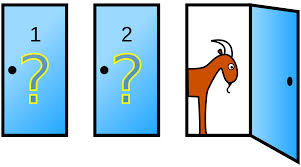

(Source: https://en.wikipedia.org/wiki/Monty_Hall_problem#)

### Simulation 

The following experiment for the Monty Hall problem includes 1000 simulations for each situation: when the player chooses a door and sticks to that choice even after Monty has shown a door with a goat AND when the player changes the door they had originally picked.

In [1]:
#your work here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

In [2]:
prizes = ['car', 'goat', 'goat']
doors = [1,2,3]
first_choice_wins = 0
change_choice_wins = 0
option = 'No'
total_simulations = 2000
changed_door = 0

for num_simulations in range(total_simulations):
    prizes_shuffle = np.copy(prizes) 
    random.shuffle(prizes_shuffle)
    assigned_prizes = list(zip(doors, prizes_shuffle))
    #print(assigned_prizes)
    player_choice = random.choice(assigned_prizes)
    #print('player chose door number:',player_choice)
    assigned_prizes.remove(player_choice)
    #print(assigned_prizes)
    for n in range(len(assigned_prizes)):
        if assigned_prizes[n][1] == 'goat':
            monty_door = assigned_prizes[n]
            #print('monty showed the door:',monty_door)
    if (num_simulations >= (total_simulations / 2)):
        option = 'Yes'
    if option == 'No':
        if player_choice[1] == 'car':
            first_choice_wins += 1
    else:
        changed_door += 1
        assigned_prizes.remove(monty_door)
        new_player_choice = assigned_prizes
        #print(new_player_choice)
        if new_player_choice[0][1] == 'car':
            change_choice_wins += 1
print("Simulations where player didn't change door:",(total_simulations-changed_door))
print('Times player won without changing door:',first_choice_wins)
print('First choice win rate:',((first_choice_wins*100)/(total_simulations-changed_door)),'%')
print('Simulations where player changed door:',changed_door)
print('Times player won changing their choice:',change_choice_wins)
print('Changing choice win rate:',((change_choice_wins*100)/changed_door),'%')

Simulations where player didn't change door: 1000
Times player won without changing door: 337
First choice win rate: 33.7 %
Simulations where player changed door: 1000
Times player won changing their choice: 659
Changing choice win rate: 65.9 %


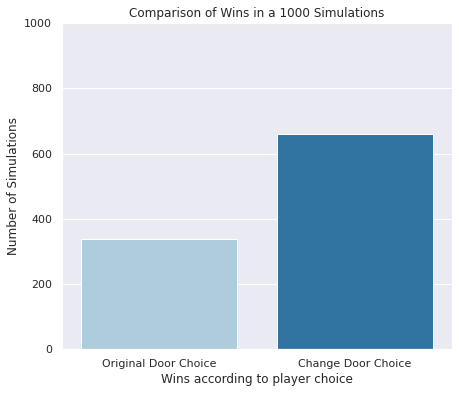

In [3]:
d = {'Player Choice': ['Original Door Choice', 'Change Door Choice'], 'Wins': [first_choice_wins, change_choice_wins], 'Total Simulations': [total_simulations-changed_door,changed_door]}
winnings = pd.DataFrame(data=d)

sns.set()
plt.figure(figsize=(7,6))
sns.barplot(x='Player Choice', y='Wins', data=winnings, palette='Paired')
plt.title("Comparison of Wins in a 1000 Simulations")
plt.ylabel("Number of Simulations")
plt.yticks(np.arange(0, 1200, 200))
plt.xlabel("Wins according to player choice")
plt.show()

The visualization above shows the difference in the results of the 1000 simulations we ran: we can see that people had more wins when they changed their choice after the Host showed them a door with a goat behind it.